**Import libraries**

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading datasets**

In [116]:
df = pd.read_csv('Customers.csv')
df1=pd.read_csv("Products.csv")
df2=pd.read_csv("Transactions.csv")

print("Customers Dataset:\n",df.head())
print("_________________________________________________________________")
print("Products Dataset:\n",df1.head())

print("_________________________________________________________________")
print("Transactions Dataset:",df2.head())


Customers Dataset:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
_________________________________________________________________
Products Dataset:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
_________________________________________________________________
Transactions Dataset:   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199  

**Steps in EDA**

**1. Understanding data**

In [117]:
#basic structure of the dataset
print(df.info())
print("_________________________________________________________________")

print(df1.info())
print("_________________________________________________________________")

print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
_________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
_________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 

**2**.**Data** **Cleaning**

In [118]:
# Check for missing values
print("Missing Values of Customers dataset:\n",df.isnull().sum())
print("_________________________________________________________________")

print("\nMissing Values of Products dataset:\n",df1.isnull().sum())
print("_________________________________________________________________")

print("\nMissing Values of Transactions dataset:\n",df2.isnull().sum())

Missing Values of Customers dataset:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
_________________________________________________________________

Missing Values of Products dataset:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
_________________________________________________________________

Missing Values of Transactions dataset:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [119]:
# Check for duplicate records
print("Duplicate Records of Customers dataset:",df.duplicated().sum())
print("_________________________________________________________________")

print("Duplicate Records of Products dataset:",df1.duplicated().sum())
print("_________________________________________________________________")

print("Duplicate Records of Transactions dataset:",df2.duplicated().sum())

Duplicate Records of Customers dataset: 0
_________________________________________________________________
Duplicate Records of Products dataset: 0
_________________________________________________________________
Duplicate Records of Transactions dataset: 0


**3 . Statistical summary**

In [120]:
# Statistical summary for numerical columns
print("\nStatistical Summary of Customers dataset:\n",df.describe())
print("_________________________________________________________________")

print("\nStatistical Summary of Products dataset:\n",df1.describe())
print("_________________________________________________________________")

print("\nStatistical Summary of Transactions dataset:\n",df2.describe())


Statistical Summary of Customers dataset:
        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
_________________________________________________________________

Statistical Summary of Products dataset:
             Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
_________________________________________________________________

Statistical Summary of Transactions dataset:
           Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147

In [121]:
# Distribution of categorical column 'Region' in Customers
print("\nRegion Value Counts:\n",df['Region'].value_counts())
print("_________________________________________________________________")

# Distribution of categorical column 'Category' in Products
print("\nCategory Value Counts:\n",df1['Category'].value_counts())
print("_________________________________________________________________")

# Distribution of categorical column 'Quantity' in Transcations
print("\nQuantity Value Counts:\n",df2['Quantity'].value_counts())




Region Value Counts:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
_________________________________________________________________

Category Value Counts:
 Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64
_________________________________________________________________

Quantity Value Counts:
 Quantity
4    261
3    254
2    246
1    239
Name: count, dtype: int64


In [122]:
# Convert 'SignupDate' to datetime
df['SignupDate'] = pd.to_datetime(df['SignupDate'], errors='coerce')
df['SignupYear'] = df['SignupDate'].dt.year
df.head()

,CustomerID,CustomerName,Region,SignupDate,SignupYear
0,C0001,Lawrence Carroll,South America,2022-07-10,2022
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022
2,C0003,Michael Rivera,South America,2024-03-07,2024
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022
4,C0005,Laura Weber,Asia,2022-08-15,2022


**Visualize the distribution for customers dataset**

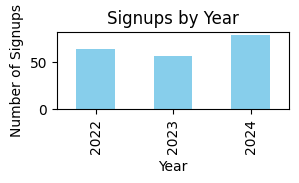

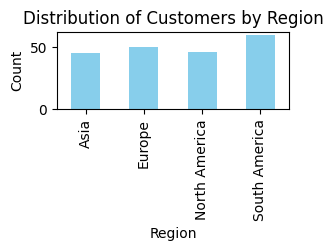

In [123]:
# Visualize the distribution of signups by year
plt.figure(figsize=(3, 1))
df['SignupYear'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Signups by Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

plt.figure(figsize=(3, 1))
df['Region'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


**Visualize the distribution for Products dataset**

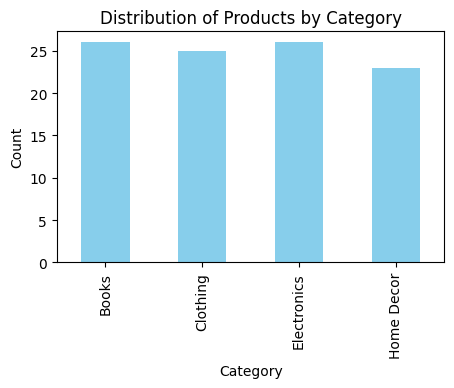

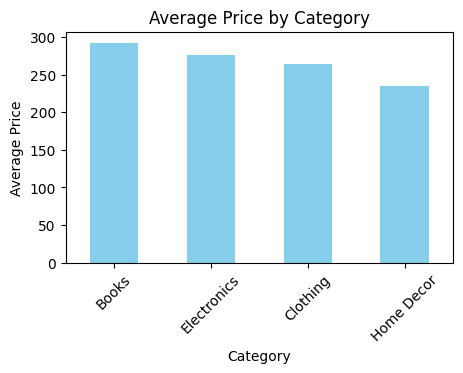

In [124]:
plt.figure(figsize=(5, 3))
df1['Category'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Products by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

category_avg_price = df1.groupby('Category')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(5, 3))
category_avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


**Visualize the distribution for Transactions dataset**

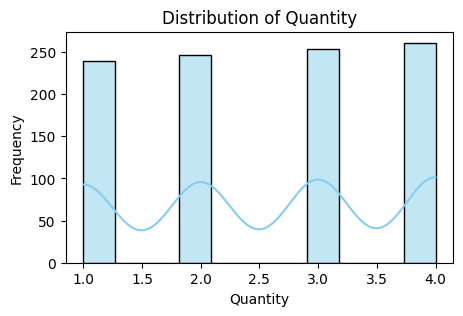

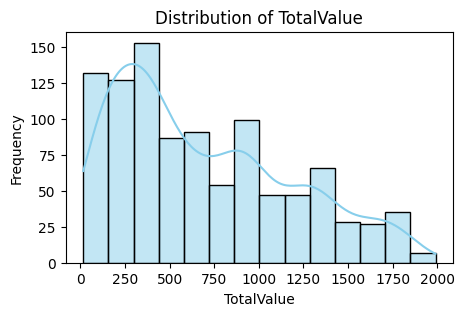

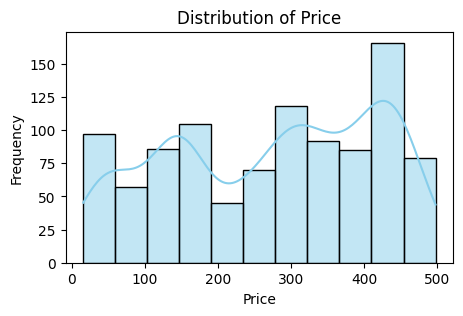

In [125]:
numerical_cols = ['Quantity', 'TotalValue', 'Price']
for col in numerical_cols:
    plt.figure(figsize=(5, 3))
    sns.histplot(df2[col],kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**Outlier Analysis for Products data**

In [126]:
top_expensive_products = df1.sort_values(by='Price', ascending=False).head(10)
print("\nTop 10 Most Expensive Products:")
print(top_expensive_products[['ProductID', 'ProductName', 'Category', 'Price']])


Top 10 Most Expensive Products:
   ProductID               ProductName     Category   Price
74      P075          TechPro Textbook        Books  497.76
31      P032        BookWorld Cookbook        Books  488.63
44      P045         SoundWave T-Shirt     Clothing  481.78
16      P017       ActiveWear Textbook        Books  469.77
36      P037      SoundWave Smartwatch  Electronics  459.86
40      P041  ComfortLiving Smartphone  Electronics  456.28
82      P083     ActiveWear Smartwatch  Electronics  455.72
22      P023   ActiveWear Cookware Set   Home Decor  454.53
63      P064   HomeSense Running Shoes     Clothing  452.42
93      P094    HomeSense Cookware Set   Home Decor  447.34


**Outlier Analysis for Transactions data**

<ipython-input-127-b8e977d01efc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')


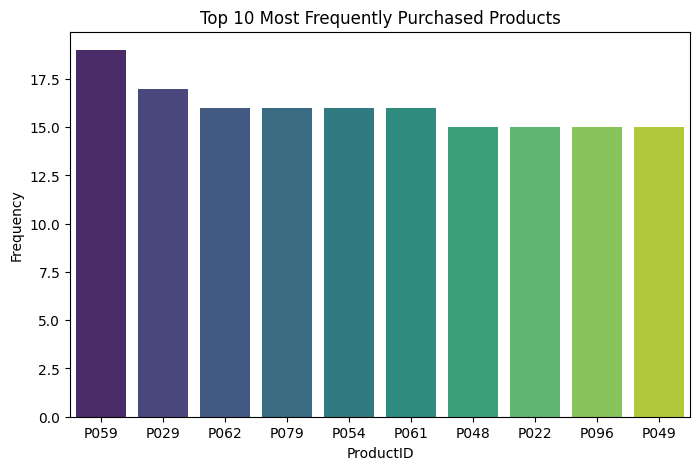

In [127]:
# Most frequently purchased products
top_products = df2['ProductID'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('ProductID')
plt.ylabel('Frequency')
plt.show()